In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/coins.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [0]:
import cv2
import numpy as np
from google.colab import drive
import os
from google.colab.patches import cv2_imshow
criteria = (3, 30, 0.001)

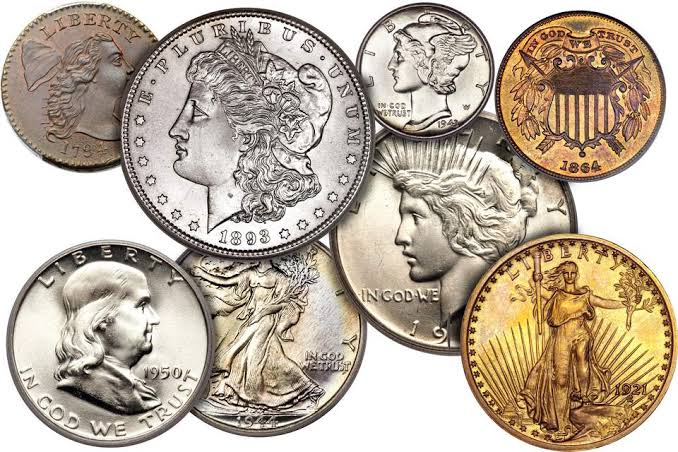

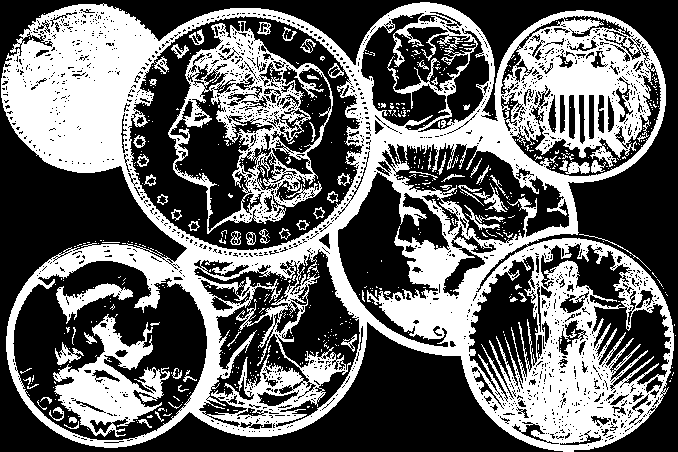

In [0]:
cv2_imshow(img)
cv2_imshow(thresh)

In [0]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [0]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [0]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]


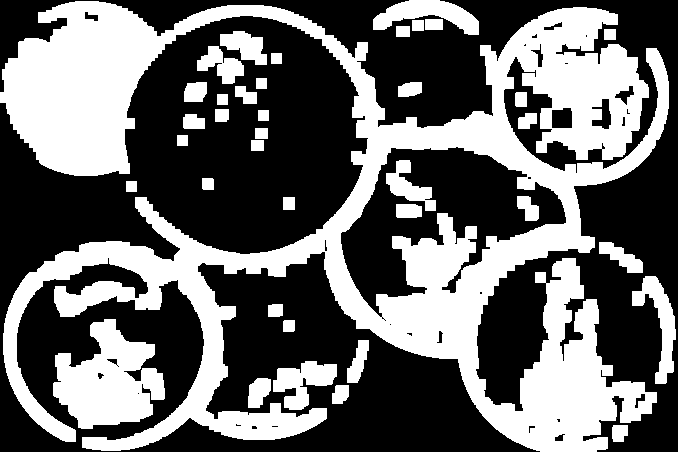

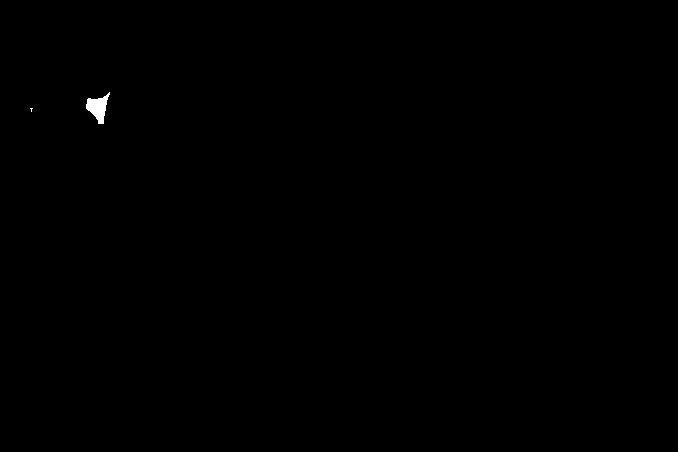

In [0]:
cv2_imshow(sure_bg)
cv2_imshow(sure_fg)

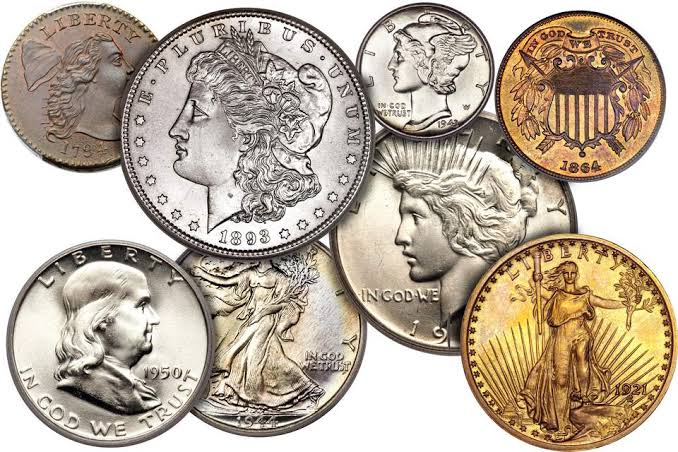

In [0]:
import copy
image=cv2.imread('/content/coins.jpg')
cv2_imshow(image)
final = copy.deepcopy(image)

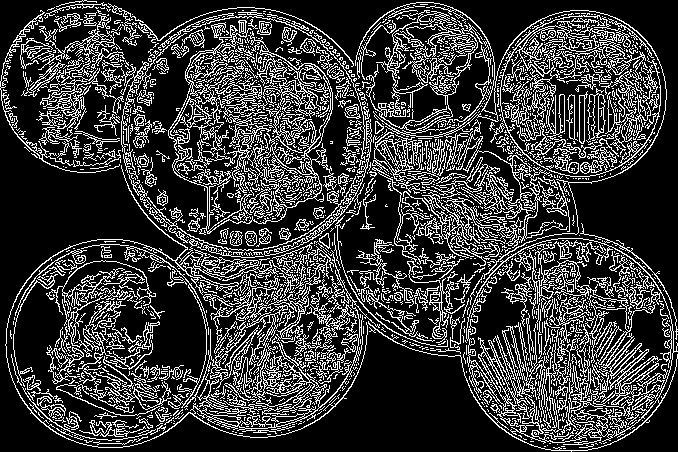

In [0]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edged=cv2.Canny(gray,30,200)
cv2_imshow(edged)

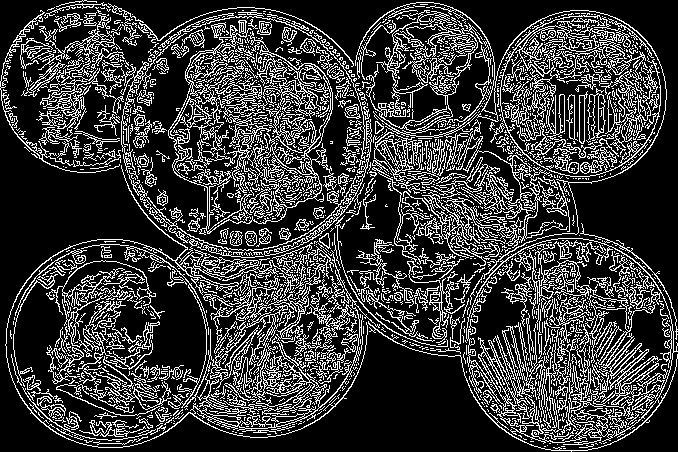

In [0]:
_, contours,hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2_imshow(edged)
final = copy.deepcopy(edged)

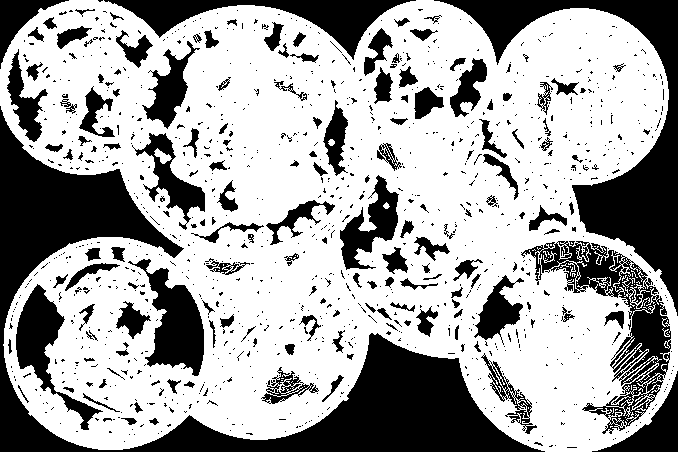

In [0]:
cv2.drawContours(final,contours,-1,(255,255,255),3)
cv2_imshow(final)

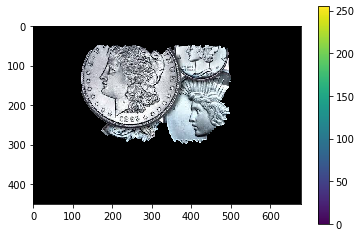

(<matplotlib.image.AxesImage at 0x7f8afdedd5f8>,
 None)

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('coins.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

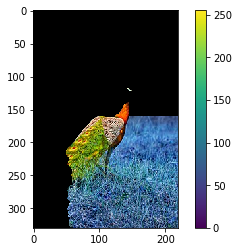

(<matplotlib.image.AxesImage at 0x7f8afd977198>,
 None)

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('peac.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

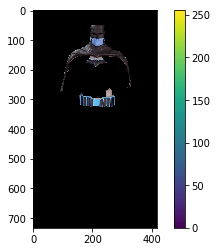

(<matplotlib.image.AxesImage at 0x7f8afd9190f0>,
 None)

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('batman.jpeg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

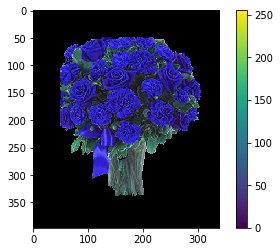

(<matplotlib.image.AxesImage at 0x7f8afd8402e8>,
 None)

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('flower.jpeg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

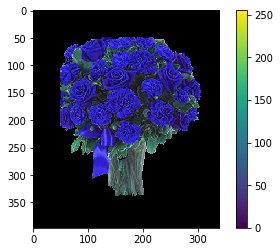

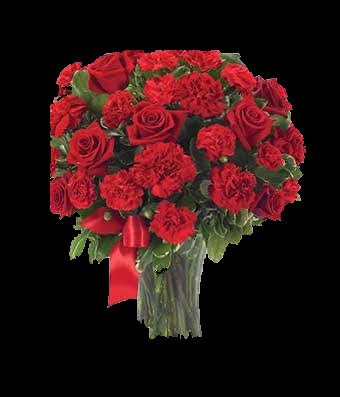

In [0]:
newmask = cv.imread('flower.png',0)
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

cv2_imshow(img)

(451, 680, 3)


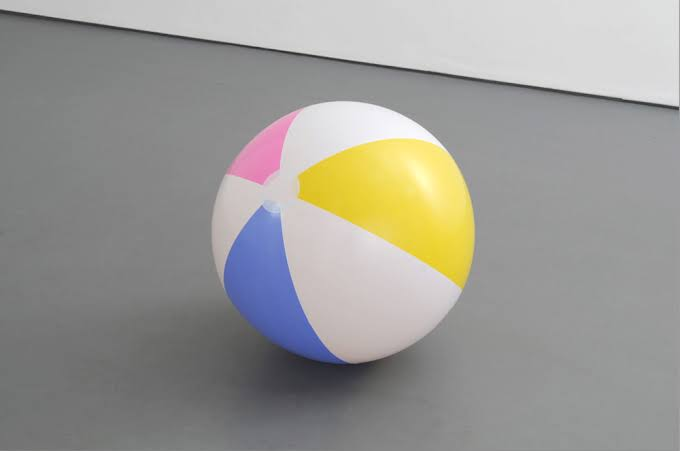

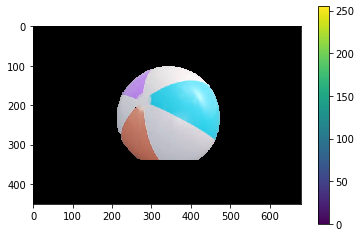

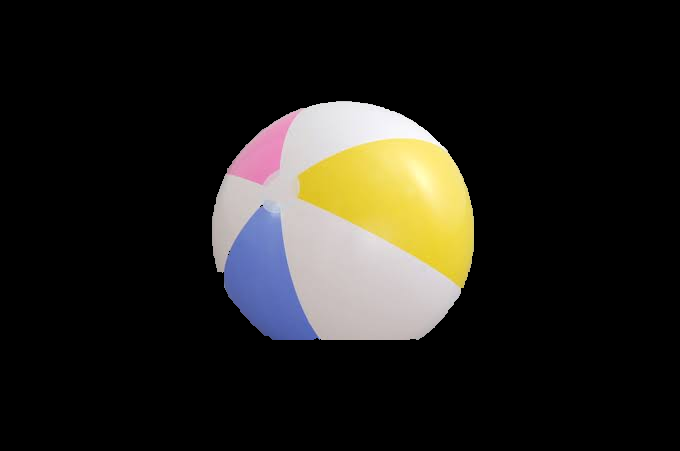

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/bb.jpeg')
print(img.shape)
img2 = cv2.resize(img,(100,100))
cv2_imshow(img)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

cv2_imshow(img)

(451, 680, 3)


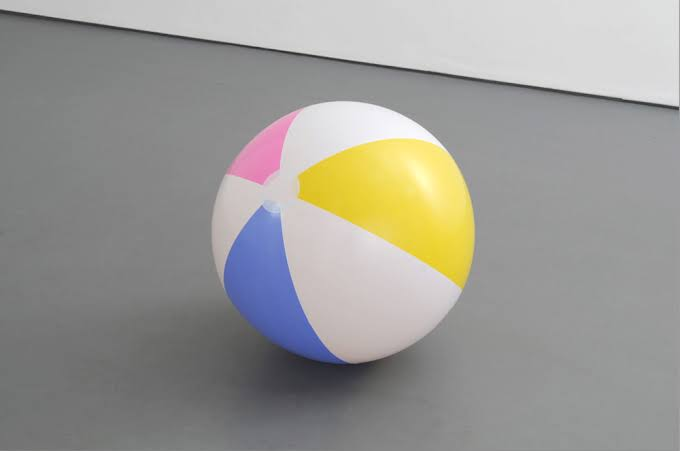

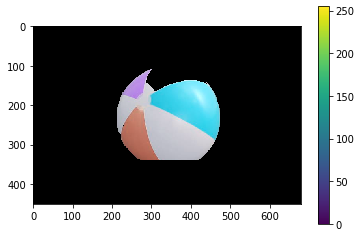

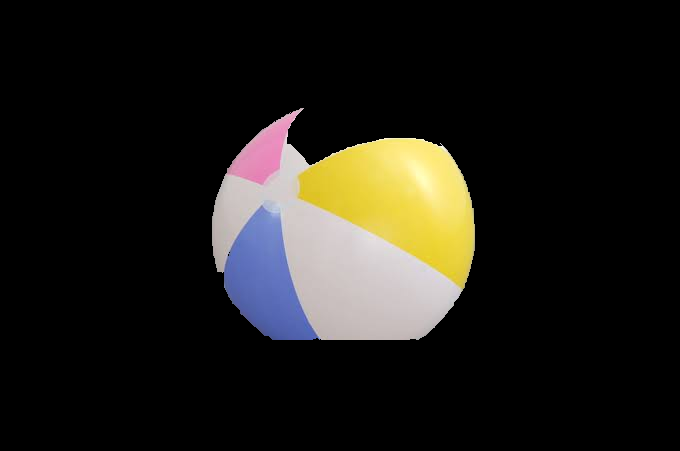

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/bb.jpeg')
print(img.shape)
img2 = cv2.resize(img,(100,100))
cv2_imshow(img)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,55,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

cv2_imshow(img)